**YOLOv8** is freely available for redistribution under the [GNU Affero General Public License v3.0](https://github.com/ultralytics/ultralytics/blob/main/LICENSE/).

# **Object Detection - YOLO v8 training**

## 1. Setup
Import libraries and check the system

In [117]:
!pip install ultralytics

In [118]:
from zipfile import ZipFile
import os

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
import torch
from PIL import Image  # to display images
print(f"Setup complete. Using torch {torch.__version__} on device ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/107.7 GB disk)
Setup complete. Using torch 2.2.1+cu121 on device (CPU)


## 2. Dataset

Download [COCO128](https://www.kaggle.com/ultralytics/coco128), a small 128-image tutorial dataset.

- number of classes: 80
- class names: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
        'hair drier', 'toothbrush']
        
Download the dataset to the datastes directory **torch.hub.download_url_to_file(url, name)**

In [119]:
# %cd ..

In [120]:
%pwd

'/content'

In [121]:
if os.path.isdir('datasets')==False: os.mkdir('datasets')

In [122]:
%cd datasets

/content/datasets


In [123]:
# Download COCO128

torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip', 'tmp.zip')

100%|██████████| 6.66M/6.66M [00:00<00:00, 226MB/s]


In [124]:
zip = ZipFile('tmp.zip')
zip.extractall()

List all of the training, validation and test images locations.

In [125]:
#generate training, validation and test lists
path_train = 'coco128/images/train2017/'
path_validation = 'coco128/images/train2017/'
path_test = 'coco128/images/train2017/'

res=[]
for file in os.listdir(path_train):
    if file.endswith('.jpg'):
        res.append(path_train+file)
with open('train.txt', 'w') as f:
    for line in res:
        f.write(line)
        f.write('\n')
f.close()

res=[]
for file in os.listdir(path_train):
    if file.endswith('.jpg'):
        res.append(path_train+file)
with open('val.txt', 'w') as f:
    for line in res:
        f.write(line)
        f.write('\n')
f.close()

res=[]
for file in os.listdir(path_train):
    if file.endswith('.jpg'):
        res.append(path_train+file)
with open('test.txt', 'w') as f:
    for line in res:
        f.write(line)
        f.write('\n')
f.close()


Create a summary file with the locations and class names

In [126]:
with open('./test.yaml', 'w') as f:

        f.write("path:  \ntrain: train.txt \nval: val.txt \ntest: test.txt \n")
        #f.write("nc: 80 \n")
        f.write("names:\n  0: person\n  1: bicycle\n  2: car\n  3: motorcycle\n  4: airplane\n  5: bus\n  6: train\n  7: truck\n  8: boat\n  9: traffic light\n  10: fire hydrant\n  11: stop sign\n  12: parking meter\n  13: bench\n  14: bird\n  15: cat\n  16: dog\n  17: horse\n  18: sheep\n  19: cow\n  20: elephant\n  21: bear\n  22: zebra\n  23: giraffe\n  24: backpack\n  25: umbrella\n  26: handbag\n  27: tie\n  28: suitcase\n  29: frisbee\n  30: skis\n  31: snowboard\n  32: sports ball\n  33: kite\n  34: baseball bat\n  35: baseball glove\n  36: skateboard\n  37: surfboard\n  38: tennis racket\n  39: bottle\n  40: wine glass\n  41: cup\n  42: fork\n  43: knife\n  44: spoon\n  45: bowl\n  46: banana\n  47: apple\n  48: sandwich\n  49: orange\n  50: broccoli\n  51: carrot\n  52: hot dog\n  53: pizza\n  54: donut\n  55: cake\n  56: chair\n  57: couch\n  58: potted plant\n  59: bed\n  60: dining table\n  61: toilet\n  62: tv\n  63: laptop\n  64: mouse\n  65: remote\n  66: keyboard\n  67: cell phone\n  68: microwave\n  69: oven\n  70: toaster\n  71: sink\n  72: refrigerator\n  73: book\n  74: clock\n  75: vase\n  76: scissors\n  77: teddy bear\n  78: hair drier\n  79: toothbrush")
        f.write('\n')
f.close()

## 3. Train

Train a YOLOv8 model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--datasets test.yaml`, starting from pretrained `yolov8n.pt`, or from randomly initialized weight with architecture configuration `yolov8n.yaml`, optimization parameters `cfg=conf.yaml`.

- **Pretrained [Models](https://docs.ultralytics.com/models/)**

- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/detect/train` with incrementing run directories, i.e. `runs/detect/train2`, `runs/detect/train3` etc.
**Parameter summary from the class:**
Config file: https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/models/v8/yolov8.yaml

Optimization parameters: https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/default.yaml

<br><br>

In [127]:
#For visualizing training process
#from tensorboard import notebook
# Tensorboard (optional)
#%load_ext tensorboard
#%reload_ext tensorboard # if alredy loaded
# if it still not working cmd.exe:
# taskkill /im tensorboard.exe /f
# del /q %TMP%\.tensorboard-info\*
#%tensorboard --logdir runs/detect/train --host localhost

#notebook.display(port = 6006, height = 1000)

### Usage example with the pretrained model and the output

In [128]:
# Load a model
#model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [129]:
import urllib.request
imgURL = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUUExMVFRUXGBgYGBgYGB0bGhodIB4aGB0dHRoYHSggHRolHRgaITEhJSkrLi4uGCEzODMtNygtLisBCgoKDg0OGxAQGy0lHyUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0rLf/AABEIAMEBBgMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAEBQMGAAIHAQj/xABCEAABAwIEAwUFBgQFBAMBAQABAgMRACEEEjFBBVFhBhMicYEykaGx8AcUI0LB0VJicuEzNIKy8RVzosJDdJIkFv/EABkBAAMBAQEAAAAAAAAAAAAAAAABAgMEBf/EACgRAAICAgMAAAMJAAAAAAAAAAABAhEhMQMSQSIyYQQTQlFxgZHR8P/aAAwDAQACEQMRAD8AroWQZGgt79alxDgSJsPX50I2rSOdY64N761jYI2TxAGN4ubVq9ikmQAJPSgy0RcmxmtUs2EquT608DCFPEiyrbmoyATr/eiWsMkAgG8XNYrDkXgRtv8A8UwIm031gGiMydBcn4+lCp/qiaKaAESqOtPAEhsINvWsCCfZjabXqMJTzv8AUXovJFxlj3mKhjNEtCbVI2gE6ROpFRofGoFe94Ukk1Npmf3g3wWCzEXMHyponhbYPsTzJvFDcBdSoAnwgU3S+gzlkx1rdRiJqxDiuCIUtUgpTAylBmTvIItHSalwvDGmxZMkbqEk+p0qclycypBB8PICjcDxUqBzlPpRFxvRE/s9rYKpI5H0rVSAdifX9qZgpdt+UXmvcc7lhCQJiZImB+9aKRzy+zpK2wM4MgTkgdfqa3xmAOSzpzHYJJjyJMfCiG1KIiVD3Co1YiLIBcV52Hmd6sxpLQqweDUn80/xKVb08/K9HjEkAhpB0usi/wDbzufKmeD4fbO8ZOydh0A91DPOByydBM3gcrkbbUqCvWLlYiUn8xt6knc76Gg3MQUAlSdSN9zO3KxojGDKUhNypYiBGgI93j+FR8SQjwtrkZgoEg3TAzA6cx8CN6AjG2c04ggLfUraadYDDFbWZGJw7akkgodMWsQZ2GuxrxvgaikrzoCRNzM25iP1o5PD8O2nxQsm2YyNd5mPKsbzZ2RhIQ4h/EIkJLK98zRDlvQyB5iiUcQKwPDJgTA9KcK4bgAkS8ULmQpCyoj3JIFI8c7DngKVBPhzpQUd4P4lA/m2mLxQ4plN0smryQr6ihcxTZRtsr96OKgUlUWG+kdKHzCIIMHnUODMiPEo8NvP9aHe9mw8vWwqZBCCEkyg6c0/2qLEYhISkC8GT6SB74BqKYyMNXgCYHOOkz529DWURh2kqT4z4eQMSefkNAPM71lDodjdvPeEzepnJsTaOlHnDAiUnW961KTMRt7+tB0gZTKQRoT9a9ahVhSLzeaZYTEtyRG0W862dY3n96YxalG+Y/vXhWoaSek0YcFvJB5E/tUPd3ECOusUDI1unQoub/pUqmwRdUxtFTBA5z15VhZ3gn61osZAVSCFbzcfCoX8WEoypkmddz/aijhQNZm8Ab1sjDCyon60osTNMG5YAg30opWHkG/Oow0ZN5gZo0ED60qdpRWd7D6tUNGU4WRYMuSG0gRuo6Ac6IexYbdCG1FSQB79zO9NcL2fxTwHctmDqo2SB5n9JpsnsWzg2V4rHOjK2CciD7R2TJElRMAAb1rFNorjpLIux3HkMMpXIkmAk3J8oqvcKedxr0IASCb5Rptc1VuI49T7qnFCMxMJBJCRskTe3xrsn2Q8DDTHfKAzL0O8eUWreEK2TN28Ft7Odn28OgeGVbqNz/ansVVeIdv8AxiPu7j0LBhRCSUJPJShYa35b1Z0PAxfWCKTYKJsWxyHuoVzhDKp/DSCdSkQfhrRib1uKVicU9o5v287OYoIC2FKcQkypIsoDyHtDnEHpQGDSkJEieQ0Hmf0rrBFUntJwoMqU4myFXgbK5eR1A86pPJhzcdK0VNxJXiEW0I06X0+tKj7XsBKU6d5y3y8z9b15iuNYfBAuFaXHikw2Dodis/lvtrVFbxbmKcUta16ypU5SSdAkcupmLUpP4TLjg2MF40JWlDpyoVqrUAbyJmfnWp4rgs13iu8D8NfwtAHqarfaRlDbgQgH2QVEkkkmdz0v60CyyYnYjl7qmLwdMlayWPHcZw0kN94eRyhI/8AIiKlbw+Yew4kjXMPD/pO/n1pFhGmVIc7yUlIEKBJJmbZTabU34O608ciUuJUBIlxRECNppOTRHRVgmdwZA1gb7b0C6BJSIsNjPrbTyqwY5mQkqCVRaImBESba7zUGIUlIKEozqIFkAW8z+UGfhU98goP0rrign2jHvoR1KVSpJBIjQ+61SdoxlUlMbXIMjNMGOmmvOgMIlBmQbDb9bedW3gpRpWMHeHKHhsVA3t5V5TdnhTakApUu/MJPzTNZWfYdFv7OKQnFNhxIKFLKFpUNAoZdNoJB9KcYrsg4rEFDah3RSpWZY9gAwpJjUg2jefOmqMZhuKAhSMmISLGAFmNcsHxpH8JgjaaeMcRDY7t6CpeQSmYWTCSfIlNwfI1xym01L+TqOYcQ4SlDgZaad7wSJ1Ll4zBsJ8Im+psPWi8TwHENoKnUIbGolxGY9AkKJmrcpxCe97lSi46pZcxKlJSEpSYJkpMNhXhA1VlMWFVjH4zCXKQp9R1ccWpM/0oTBj+pRNVCTksBVCRphV4g+dZiMGb9dI2rbEOiPAkJFxEk/Mk86jZxyk68t62sklbYsNCNP3ivU4YGDNt4ufLzrxKkzAIVzg6TeaJZPhETrfYe+lYWRLw6SnxGoxhyUgD4++mQSjUCx2n68qhIP8ADGlzty+dMXYk4RwZ3ErCUAAxdWgAmJJ23tXSOD9lsMx4igOubrWJ9ydAKi7OYIMthAidVnmf2GgpyV10RhQrCc9cQ+2PtOX3/uqD+EwfHGinYv5hAOXzKuQrp3avj4weFde1UlPhHNRsn4mvm110mSSSoklROpJuSepPzrQlmNXN7Ca+jOCOfd8EFkyG2iozySnN6C1fOTJ8QnmJrqn2i8RdRgWkJUAhwZVAWMZRrcynaLa70xHKX8YpbilquVqUs9SolR+Jr6W+zrEJd4bhVJkw2EnNc5k+E+ki3SK4J2K7JOY94InKgXUocum0/vX01wnAoYaQ02AlCEhIA6Vm0VF0SpTUyRW1YoxSSKbsqv2ldp/+n4NS0n8Vw9210UQZXB/hF72mBvXDuy3G3C6UOuLUh2QsFRVJP5iJuZgzTv7c1unGoUonuu7CUDYGSVW2Jt5wOVUnhToSpJ3Mwfh+lPQnkt2P4a2hZDoCSCQZWQJHqJG9IXVYWYDqpnW8DylOnrVj+0PB9593fTJU4w2VReSPCTbeRvVKRhj/AAny391LrXpjJpPRtxXCGUqKg4CICpnTY+U/GoMVjCoJlIzi2cbp2EC1uYqdLYTrmHpXv3YaxY8xAoF2FijJ0plwXDOhYWkFKYMqjbeP3qVGDSBmICpsJmAeZA110qJWcT4lQbG5j1FDygUkPHMaogpz2Oq+fRIO3WsYdShI8Yy6wPaB3Nzy58qSJxbgEZiR1AMeU6VGUrMkkqk3/eoXGV3IuP41Lq/D7KbC1zzJ9wHpUuDfbQwQoALUrwQJUYUT4j0kp8q0ebJ3micHgtFFN9B8/wB6vr4DmqC28SohKU5bJBlasoExa+8msrxbAFhBO/iFum9+kfpOUvuyOzLZg8V3J73DqBUI9tCS4iL7gyP5kx1irNhO1CXyFqT+KnMqB7Kl5cqIG0qKZvFgap+AabV+GtRYJP4a/aTJt4xEgE7g25UwwuCcw2JSHmzIIzBNwtJ3QfzAmCOoGlcfJDtE6bHeJwmb/wDnWsoZZSk4hY/MqAQhM/w29VDUm6PGcYcSpQwgTh25hOUJzkAarcIzFU31gTFP+0uISnDupbSFLU6UKWrdQzKWQDoM2ZIGu83tTCgqACUyYsADc9ALzAFVClGhnjuMdUvM4VKJi5Ou1z5US0CRNzPMfRoV1tQOUpUFAEEKBHXT1HvphhSqDBEjnaRH9qoTI8iATbKCAI3nefreo0pOaAVAEgafrUyigk9J9emvOa0LiiLSNLfGRNAiRecEBJzAEiD5mnvZXBKWsrWJSm8HQq2t0191JmXzAhQB0vb5fV6u/AW+7bSD7Rurz+gKvijbEyxspyiPf51o8v3VF3sWqJ143rpA539sHEfA0zPtKzq9NK5klRIqzfaRi+8xZE+yAKquemSzARInzruOK7N/em20KMwhAgbaE7bmuR9l+G/ecWy1BIKpUByFzPSvpfAMhI670AD9nOBM4RvKhKUneB8zvTkLqErrdKqTGieeVeTzrRBqWpGU7t92OGOYUkRnF0Hkfq3rXKuFdhXlIUlaS2tCwiToJOtrERyPKvoZJqHFYYKSRYE7xQxo5L2/4P8AdWMM0F5lAODNEAyc2l9zXOWmXXFJTmJVsAQP7V0z7Y3x3jAkSM0jf/iqlhGAE5wLqsADHyufKqatIw5XQlVgFJmRB959Sf0rxDXiAiSdSSJHknU8qsCOHeHO4coJtzMakDcnQedBcGZb/wCpeJclbZKUkabgA8xkn1qKzRkk3k3XwuyR1V/6/wB6VcZhtYCgAMpMkgaRYCPFMn4Vf3cMPDF4P6VS/tHZCUs/xFSvcBf4lNaOOAhugNGEOSwFxmSYn3HkfOlrOPVu0sGSDAkf81BwjHraUm5KQbidunKrFj1NlQdQuUrAJAHizC0QT5a6bmpWCqrYC4lBTmgjzGX4Gk2Mx6leEGwgCLC3zp05+JIlMj8gMx1PM/UCg8Rw4gcztyoY1QtexCoCUSlKfeeZPU8hYVlMWuHkiCYsDz1FZS6ldkdJ4NxzD50jE4doJBKczaMsAi+ZA8KhE3ABEVbMRgm2yjDKUSB+Lh1m5CRcoB1I08PI+4TjPZ1rEtymEvlBhaUd2h3mkozHKvqOe4ovhT6jg0tYllaFNrQ0nUk5RmSsEgdU22tNcTfqZ0Cp/gfeNtoIXKnVLVljUpBJzXhN1RYmSBFQ8Vw+Jw7Sm2Ggy1AClpI71WpicxWE+g3gAU1xmJLTfdpJzuKcKDoEJCbqmYsb5tgaGTwBH3YKeWtpOZTpJEOK/KCSoKUCRJPhMBYG1Rx2BQ2noiSRJE+vn7qIQ6mx3MSBvvTHiPDEISFMFSmzJOYgwZjZCYB0HU0MjCFTRcJ6D+aNv3jTetQIsyToEkTAHx361FCQSLmLGZtrUInMUiQU3uIifhvFTuPwSRKogfDU9DenkBhwRoFYETuPOrq4e7g7mqp2XcElXLmIvAgWprxTHQJNuR5/tW/HiJPo5bxV49ZrR9cCSYABNKuDvT4j51txzEQy4q/sECrA4rxnF94+6ubFZjym3woIGtFGvQbVRJ0j7GMNLr7h/KlKR6kk/IV2hpcC9ch+xrFBLb4Vb8RPxT/ara52pBcKUiYMfV6TlQ0rLarGDSiMNiZrmnartKcIgLVdaz4EAgHqo6wn360Z2A7VjFtqKrLSYUkXifZueYHvBp2I6P3tSIfFJ0YqYG2lVztV9oDOCW22pKlKVc5fyp0kzrvYcqRRf84qWarWF4j3iUuNkKbWApKgZBBE7U6wWIChE3pAcc+2hR++N7Duud9VbelVNnjRYQAlsKUZhSjASLA25x86vn25oTmwyvzHvBPMDLv/AKvjXLOJQUJnMVTAjTb69avwzmrC8V2lWo5lJBUNyTAHQCKRvY1Xeh1KvGIVN9eXlt61ItHMEcq1XhJ2qKFZ2Dg2ObxTCHkWEeIH8pAuD5c/WuV9q+NJxL61AnKiEtjYjRSukm/lFeMPvNNuNoJyuAJUBy394selR4XCErSjKFFZCUpge0dNDaOdOUsERSTBuGeIlRHgQJUd72CR1JtTbD4cuSXFQDEITaANBOsXqTBYJJX3apT+J4i2pESBBUAoXSKtKezKP/iczRqFEEn3RelHISeRThcK22JSkCfj59KExOMQXCiZVlmw9PoU34nwtaUEiVKv4RqIFgPOR8aR8J4e741KHdqBgy2kk7m/KbAdKvKEvzDFriJGyR8B/esqZ9txITLiDIm7XpqFDlWUWI6dwNnupU864W3VE5jZtKlexqJQq8SLfCmOIUpKoWT4PFMCTlskk7nxRO830pXhO4zq9tK1IzBsQlESfCEbld7KkXJtNM+IPNv4IhCiSUKSCBCoTcpPJQgSN4rzoNf0dIFwp9SVoDiU/wCE9GaMo7paQLm1gVGeo5UmxHFkuYgKR+O7dIWsK7tIOqW20+JU7qVrrlppwxpa1seFK2yh5BWTeSLoCZuCsmYBJyk2Grh3s0G2z3RabVEnMlS0ADXN40iB/NIHKqptNId0JMQwptlZ7kZQkqQhLaUnMCClKkIAkArUeuU86R8WKswaFglKe8WRAzGPCIGgOo1UonpRrvFHwo4crRAdQVFKUBPdqTm0AgCyuulA4wy6Vuy2jMVJQIzqJ3I/IYOqh4QRaSZzTJT+IBeZISClUmbkiCdxoTWqX0nYAKAgHc87UTisWYGQJQLyEyT6rMqUb7mOgpevw/mIAPIX66+fKtVZoMeHPo7yAI0k+nWteNYrOCnluKV47FRlMib6H3etCJxwicxUb+utdEflEtlv4YqEIBOgAPl1rfjDpLK/6SAPT50DwV/M3J+p+hRBczAzpJ931NWI4w+kgkG0E1og0w7QMZHl8iZHrS4GmIvf2Zu5lOtW8QSoc7GD8/jV+dLbZPdhOaIMi3rzOtcY7PcTOHeS4PI+R1roOI4plhaVTIkSTFxqBv6/3qZOhxKBx51xWIcLqjmzGZ25DoIrov2W8FW0y5iViEuRlBF1BM+LnFzHOJ868x2f+94jvCRBMqnf0H712bhA8ITsAIA0AqotMTR5gE5yAqY6/KuPfazw9xHEFKWnKFIRkv4SAMspnS4Mj96+gMKlIFqpv2ucDVi8IMoT3jbgUkkxCYIUJ5G1uaRVEnN/s34s+D3IcIaF76Ak6Dzk2rq3AS4k5ysrBkaRG1cp7PYVOHABVKpJkaHQR/euo9neJo7rlAMnb49Kzu2aLRUvtqxwUthoEZkpU4Rv4rD/AGn4VzV91YALZIUDtqAaYds+NHF4lbskpHhROyRp77n1pM6+pIzJUpJkXBg/DatHozZMHnvzMqWOYQfmBFeHDYhAU45h3A3/AEkQdr6xMTW2H7SYhJupDk/xoST7wAat/Au3yUpCXGBI/hBVI3sTPoJ8qhfUxyvCl4JxeIUEgAAAkwfhRrSFoaLiEy86e4Zy8tFr6EyEA9V8q6FxPuX2e/wrDZctK0AZkjMJBkCdwQoWn1pK2jHBRSktZjFlWCep8PiUehAtQ43gOwbwZDODaCW1JJiFLEErI1M65QZgCwFbO9oUEzlzqiSBrANpsBvuareP4HiSfxVBSzY3J59KWowpF0r8otenciav06WVNuoJUItGYXykiBr51WnsT3Tpbc0BOosRJEiPI3pn2TxanUFtYnuzqNLgi50zTHxpb2xaEoAAkLMqOozRvyzXPnVbViPMTimpAVGgNlW35+ZrKr+LZIMdSPdXtLsOkX7D8WStYITKgolChcmDCb/xaX6wZovB49SVv5rJdJcQqQRnur2bZZTnBBGoNR8RwGEwrhZDjneWJDYkpT4gPbkG4ItBPS1Zw9jL+M4UqZCC6CLF3UpEHxBSioAx/CdZrztYOlJhvCnFd6l5Su6QhHhBPhbQfDmUdpE9VEqO4ofjnbNlTqGwHnGTyyobUQRdZgqUelhB0pp2j4Y09gy4D3YIQpAWJShRhJCkQcyxoAQdALVWOznEULWtC3nHVMt53JzISUSkKUlAMykHNFrAiK1cqX0F6OOI8OZcedQw8WsS62gNhyO7XaQEqAlKykEXn2rUnxvCm8OtKSpa1pSAUJMIkDxFZiVePMYEedNlY9JxKknDYZaWQFBYRCgZ8ORaVToNfKhse428F4lgmQrK4lfi8lNKUIKSZGYpJ+dJL0lyrQlwSgp0CRfTl9AUTxD7vOT7wkrAnI2kq3m8detK3EHFBxSiABFio318MzOnzpRjH2WbNgJi0JNz03gT5U01WTODfzORB2l4jKylMAJG1jJ109KS4fGkee30OlR494qWVEATrQJJmumOjouzonZPiOZMbSJ+vcfWnIeJF9Z/tXPOz+PyL6EQb+f7/CroHd51v+/yoYyu9r8HPjA01qpiug4rxpPrVExLWVahyJoQmRTTPhnGShJQsFQm3SlZFRGm1YIv/ZziYadSsGRNwOW/7+ldJY7XYdhfdrWAuxKTYwdInpXz7hMUUKkHz8qsvEcajEtIU4IUkZQ4B8wPkf1qV8I9nem+2GFCkgrSCRIvQ/bbjzaMEtaFBRVl7uCIObQ+QF/Svn/hmGYK096orTIlIChPuE/EU97bdr++CG2QUoSI5aACwGgEW86qxUFcPxqEyt5Xv0Ota9ou2aFNFjDSEmMy9JH8I39aoT+KUsyo1jFKKoGxmpe9GcNwhdzQnNEW8/Kg0JBHW1P+w+GzYmCpYQlJWUJUQFkFIAUBqmTJHSNJrQiWjxfAFJRmyCdYFzOyQBdR5x1q88K4W0lpB7tIzJSTIEyQJ9q/pXnEFlKVZU5QAblUJSOZNhFedjOIpdw8q/KtYzkRnSSFAxrEqKR0TRg5m20PEsgaCLXAAg206QNupqu8Mx3ftJPdlKhPgMFSL6TAPK9tadYzHoCLKBJBiR5TJ6SRVY4ZgX471gpkyAVKiecgA+H42osFEdYxlZalopCgLZhInrGxuJH9qomNdU2TmbSFAeyQYB9FfU1esfx1rDNj7wAnYlAKk+7WOl/WuaduMfL6S2uUKaSoEQQZUsAz5WjaKG0XCLssPYTjK1vPIOVEpSUNpEJ8JVmNySSMwPX0pv294clWEccKlApykCQAZKUwREnXnrXMUqUw4l1s+JCkqB+N+YIsfM057UdqlYpQQAUtIvl/iVFyegkgDzO9l2xRbhnAnZ4s42MvhUP5gTHqCDWUuLlZUo06o7TxjENDEOPPTLrgQhQjwhKcoUARB8RKo08QNQM4XvEd4HC40shaJs4tQBlABJAOdCTrF+lWNjANO+ABDqwJWFCISZCu7WbA38yI8qacNw2EwzSWfCsCQqEKUfEpRPsjKnz2ivOwaFGdwOOxeFUylxlhoqC+7ElaCnMVIzg5HFGyiEmbXANC9j+w+IbWp9rEMuZm1BBvrYgynMMpy5TfQmrN204NiXF4dOEIWlsRdSUZFAmFyoxB0tfpehmOHcQwzgfS2F5lDv22lBYkjxOBIM6xmAF83rWzbpoi86BOJ4T7uFNKSWwQHHtLNgAJQFA3kjKDyBpD/wBZdgdygJSm0qtA3ubJ3iATymK6F2jeafwii6VJLK5SU+0pMxk0mJIB6jaqFh20A5u7UlItEHJJuMpuJte88yTTi8UjOXHbsrnEe+VIS8txF8xCShE7hKRdXmQJ5VvgeEA5QoiTe/yHU054g2ojM0ZGvtez1tEidd7760GpC5IUgKvYg3sZFxorz5CnZS4ys8eaSl4hBkQPfSxVMeM/4ytvKlqjXTHRSVGzLhBtVl4bxOUwTaLc6qpqVl4pNDQy5oxMfXuqtcRH4ivOamw+L62qPiSpg9KSwwFziqiJqVVRKFUI1o3h2IUkwCb0FRuAbvSehjlvFLg31/v+5pHxE+M3nnTRTyUi5+tKRuKkmpihs8FToWBUArdKaskNaxVxTnC8QWwtD7ftJMkbKGiknzB9DHKkWHQKZNujIZEgbGq8EywY/ibmPcSHIbw4PgaBssi5Wvn0GmnUlzhHmYsQVAyNYtIHS0n6Fc7fUpZkmeV7Dy6W2qXCcSUyDCElX8V5+FzvvUqQnDBcOIcRLTZ7x0qSCqLCRJnKMoExzPWrHwzEIUEpSq2UW3GlcpxuPdeCe8Ii5ECBsJ/551KvtE+AgNHu8iEokXUqABJJFpjQC1DkT0LN9phUlCEq/Mv3gAn9vfXP0najcUt11f4i1uKG61FR6+0elanBqyZgLAkH69B76RawqNV4nw5d4ien1apAnMjNMlPhV/6n5itBgVWB3P8Ac+763ifC4BwkkJMGx+fzHwosdAPdHkayrI1wpMb+ca/GspWX1Oy4TiuGfISEpZMFdjByyElSkjwFwyIQQoxuKFfRixiAGC8ptoqAObIFKUdVAZZShMCALmbCud8OxikKbcS2kBBBCnBJV/SnU1c+AlGLdJyfighS2XCU9JSCDInqIPnNedTsLLFgOIuuZ04xCggCzjiUtFMXnMSCpPkDrqalx/F2U4UYtpoYpKLBTah4R7JOcGY2MCecVuw6082sJUHlMHNkygvMn+RKk9COtAKew7SXXlNPshxEPNkBOZJOQuKbOigDJO4nWDWidLIqQi41xRrE/jKAStlfdrCleFQIzgmbSFJIMkyBc0hwvFsyAslRSo5RbMtUSCdLCwgnl5y4xXZ1gjukuKW2VpIR7CoAAIciQsEyZTAvcSKhx+AcYTKZ7sahu2XqYNx12qlOOieysQv8WSlWVSRmmQJv6SQBfedq378myk5j/KcwF7yZF7V4l5srJcUCoGIUu5BNoSTExBk8/djGFTpI/qBJg6yYAA9P+bwWmnop/GlAvLI0J/T5UsVTXtGgJegGSUpJ9f0iKVqrpjolmleV7WUxE2DBKgkb0x4nhC2gTrMbH5VDwJuXJBggfWtNuNSWjJkyOfTnUN5oZW1VoqpCK1irA0plg1QyvppS41uhyEkXpNARlVeGvK2SJpgeoTUyE39K1QKmSk7CmhErdHtt+DlN/hQbAk2pi8kgxyt8rfGpm8CYJ3fL6vQ72GJimeHYJvprfbn+vyqcYaRpmIgkD10+ArLsLIpThpneP+LUZheGgRN7/K+lMMHhBnK9iDY85E6bR9Xsxw2AmZJiR1A5jQ3gT6UnIdASOGoEEAb66yB8dtamwuDSqRFzFosdf3J067Uc5hwBuQCDOpEWsJjQnX+wxLQT4oAhQkSZEbeR6+XnNi6gQ4ekQoIg/MSdPqaJTgfEDm2iAfTbzj1oicsxCglJOWDmJvOnQ/CoUlwgFQtEnnExIA9N+elFjSYPjDlMaRy6351lT2Bgkan1FiNrWOhrKdlZDEsYd5LWIBSlUEOtk3TNgtRt4RBg6mRuKsfZPDpQ40lSjnGYoXBnJOU5uTZiATcqvoAaquCSlpKRZayk5m1pCkJjRR/mhNk3MzR7nGO7UhpLbhz+EvBJSAoxA3EotE2EmL3rCrK0jobrgS45iGk5jmMhNnJGoynwqBF4MdDMRzlXaxxOJcS+FLaUVlKHE3CCVER+awtEyI0q5YBwNpQwDC1BBQpSsxKkgZVLPUiOtQdtGW1qbPdt6qS4CPGlWs31TZQt051lfjJnrApwRaZ7srcWoKBKEEmL6ZoTmtz6+lVLtHiHFLUpKWgUkyGhcje8+L1irTisC6tp1SXFFU/hNobKioRJzZBKR10tF5rzhjbOBaD2OU6taxKGGyUJSNs+QgZvM26mqg35Rios5xh+IgSUo8UiVZRmJ84nY/GpVcWVcFKj1/5PWrpxngbC2lYlZPDi4olIWpTqnEkC4QAFpObck2NUN5OWUg50j8wBSCBJ/MB9DlXUqZoogXFnytYUQfZGpk76mg6J4j7X1ahjat46KNKwV4awGmIZ4N7InaTv05VJi8SVJ/tS9K7VtmqayBHWRXprwmqGakV60mTFYTRXCwO8Tp6/2FDALw/B8yZEnY8/d0A+Nb8RwSG2yUxNgRIkTtzHlHrVgbCQYmEH1VEGYPO/vHnVU4q4org6DQDS/wBb1lFtsKBmU3ooJ6bUKk8ulFIcB/T9vL9zW6EF8Mbl1PmJp6/gUyCsKyzKjsbyoyBbTTqOdLOCMyokTa/LkNfWrEhOfxKlSogchIjTqTHu5zWHK8iYK5h8yegk2I1E5rDkRF40MaGpihISBEQTnywozJUBfWOXMCdKJxbhKySfZBkmLKCY5DXSLRytQ7ZBSYEJGpIPmATpoTvGnKsWyWzUgAk/mBmL3BHP1FvpMwdCRly28r2kQdyYIM6eKgnALqSAowBeRFzcen6epDGXKTJXZRyzvEjXYHWdxO9FloYJgtZTqCQJIJiw0jQSobm+lC4XDpUAVnMJM87hCiCTfe1tz5VFhlq18ICUgGLwVEqMp5ef96lWQCEg6aKtpfLF94A9OdMohxjwaVnMAwBMWJJEkcha40HrUWKJWAc60qAHsmQRsTe39tNyU8yMniOaSRrtGS+mt/LLWiVlRTlChqCYvqB5WsY5ikURtKCkpC5kCxTIJ9E2A391ZXhaExKlp1F/fY2EE7c68pjLFh+FLSlBV3eYrUpCbhRUbwVWMmY6SOVOEcLKSpvvW4dSSlCnJKVxfWQcpGxtXvEHSvDYjKCl8HvEI3BCgoFKvzac/StcaIGZKRlcSpxPJDgT4knkFD5CsnokC4jwBakhCgUwpC0PIWCkFObJebhMDwnczVqfxTLzZS4fxIGogzEBQ21iRy8qrmG+9tpCMMjM2Z/Cic0xKgdZCpiTVmaS5lCXMOG3VCAqARe5mDAUOe9Yyt/oQzzhCHcOw2gouFd2FlV1ETEgDQXpc1wNCH3MVinFOGZbaPstxoSkqgq5U0wrrhnvEhQQqQpM2JlPrINF4Z9oEiyXM2i9SfIXHSnxWCKwy2XnFuLwaHwEyTiJUvLqYUAptI18IFIe1PZJp78TBIDBj8Rsk5eWZGoGsERFwbV1lnijYgKW2L5QdAVHYTvSXjHBUkkttkzqgaRzGxHSuyDTKwcMc7C4wzkQlcawoSPQ60PgewmOdcLYaCSASVLWAm0biTNxtXZXMEpshSW3EKTeDIBHQ6EdKI+9tlaXTAOUgkmBeJB5wRvVvkrBjLkp0cU4P2Dxb7qmikM5QSpSyCBBiAEEkmflTNz7K8YlV3MPk3WVqAEEajL5keW1dWQhDeZaUWJJUtshU7yQaGxa23EkgpJ2KVFsnzSbH0pd23gXdt4OYn7PHTBbxODJ3BeIHpKPnXnF/s8xSIU02hadwl5ux6ZlCxvbpV2ewaJhSFD1B+BE1A7wVlc5mXT1ypj691X8RrT/ADOSv4ZTailYhQ1Egx6gkTUCkTsTXTHuw+EUdcS3N9UR/wCQNRp+z9kQU4hwQbE5D8BE/CrsdHM8tEN52zmy2jU6EG3zB91dDxH2fJKCn702PEFAqagp1BE95dJkf/kVsz2EchKe/YUjunGzcySuSFaECFZVAfy0mx0VrhmMSQSZSPzAnSdIB5ikWK8S1KNr6SJ/bSuhs9m3cOhCe/wRWkKBK1KTKJCgPQles+3tSfH9lcSFuOFttSlAhOVxvIkqMFUKUCYTMW1vtUxVMGUoDrWwnWasLHZ91JSr7utYAWpQEKBiQ2jwEg3AUdjmihBw7EEgfdX9rdysE/DWKuxUS8GxBINrge8dRTnBujMm5ESdzMR+WL2kdZi2xHA+yeIcKlBpxgAHKHUFJNzaFjlubaVriOyGJbVKlGxMKIkGesx6CKznG2FEr7maFmVAp95ECFfzAAaa6xet5JhRTIBEgmJka3+oIoAYJ9tYkQ2JCozX18UflH5vQ00cbSlMC1zA5AwY8hBHn5Vi1RE1RE7hEkZ7TAJA0iYAEeRP+keVCsuAReEi5E77a721i0UetkBK0mCkJsI0gouYI6xtFK3sKoeIFRUQSZvaDbzmfKRQlYRyMe+DggxPU9Rcx5/HzqD7rMkqKlkwegIB/LMmZn12pWt1xtSZ8R9kiQYnYAX6bUxXjnFqDaW0wYBzkynQwb8yfIg0+pokHO+zOwAjNmibn2ZH8RMxpOkWGeeXq2mSROYFWWw1NoA0i/yqIpEnNaJgnROukmCTA57VqJvukwYy6nWSQTB89Z8qdFIOeZVIE6Tfwg+pVNzrWVC48bQYEaqVPpImNYiYsaygZ0rDY9kpJYUCD/Hnkf8A6vFBsjEYoutgN5UpKgoE3IOUpiOpBoTs/hSta1LSciG8wGVKUqP5QBJVqd6Z4TiCW8WpsEFJaKVH+cEFVx5gR0NYP6km/B21MOKS2tOduAskz7VwMuw617jsc86QlYLYU4pMJRIhIKpzE+IyOQ1qs964jELcTCg4ZCp8KjmgoJ1CkQNak4nxx1XhdCk5ZKSk2HqLXmJrPq1cSGWbs+8lvEqGYKS42RIsApJEApOhg/UVvx/FLbfKgtlAWfCHE3VCRN9dJ3qj4XifjUpt0h4EZS5dKoIgKjcnQ1HxfjLz+IaLiSpSQ4C2QLKMAD+m4M0JtRoaLJxTFttBtbuUFEqQ2hU5lEQCJEiJJ8zTLg/HFAhLpyrylaWhNk2uo876bwaA4FwRhX477yVvSNIIR0AOsc6dcQ4b3iMzbvjB8JWgX5pBGsiYBqoL0TsQu8axKyczi1DNGVKUhJFh4Sbec6c6IZTKXAlxK9Pb9kXAsJ0Mx50GhnEZElHgAJUoZIKp1JCrwATbrRTjTGIcDQCwe7JUpXhFrqEgi1p9Ku7Zi3bz/v2A1OrZM+Jk8zdsx6mB52pZ2g4k0MrrndZzoppVlXvKRJSoc5vThLbuGSQpSXcPFgUKUR0lIJA6nekfDOw7ONxJcStxtlIBcEEKGwQhZj2jeSNAbXFaw2aQh6CYXiiV6Zbm2pIn+oX1qf8A6iUkjvY/lCo95A16GoeP9m8PhMS6hp1xkJKQMypBlIJgmcxBtegk4QTLeKzDkoJKeUhQSQPK1aHRhhz/ABpwgplN98yAeW5+taGQ+QJzEA750RtuCRFRMhUkJWhZkWSYV/sg2BrRD6M+UpUneSkR70GKLBJEzjqp9qTtDiD/ALVa+hrY4hcifkDHlKRvWsODRLZE+EzmJ8ymw8yRUbIIJhA8vDf/AM45XPSlY6GeF4w62DClBMTBER1A5e+KKwvaVah4YWRc2Vl6Xg/v0pK6i8BpUEAmGwoHaZSsn/x2iaFSy2D4vcsG3OEq05mBHWn2ZNItDfG38xOo/h7pRA6yRmr3FceBjPh2lDTxoVf0Umar7CMOo5j3c9QoctoCY99Q4pOeCwvD6keJ0pn0gW6zQpsOqLC12kKCShtlKTt4kwegAiPrzI//ANQskBIQeaVHMD5GE/I0jwmEQpHifCFECAhwqM8iCgDpIotHAX8uZOIWE6xKh6X1HWhTH1CeIgqR3icsG5CUwIPIHcGBa15tSp1JKgrdRiwvOnn60/Tw5KErC3EpJBkhQhRjWEm5iNp61V/vtuUiJ3IG+vMa+dRyZMOSJOl/cnWI1MX6cpPrUvfTYC+mbe4I001oAOWgc/U6ftWyMTEjebkmOR06AHXn1rJGMbGjaZIOVEbhTaCJP9QJ5fHlW2EwoSpNwQPETCdTpobco5RSpniczvcTp6gx+v8AzseJpm9oBkxA3OvIWJHStLOqLY6xZStCkBISFjZSdNSAAdTJH+qoC8lZKHAbAggWiDYnWVAESSNRNL/v5TARB3zG8DWyUxBNvFIoXGN5fYgJOVUqvMgGCdNFGY5bSBTssYvKw7aiLkWnXX3Ei3kKygFCQnKTmi/iTESf4rjbn6aVlFhZf+Bf42I/7TX++qtw/wDxcR/9nE/NdZWVhyELRI3/AJZv/vo+VKnPzef7VlZT9BaGnBv8s1/Wfmai4z7Z/wC2msrKUhS2WLsp/gH0q78C9j1rKyqRK2V/i+j3kPmaS8U9lPrWVlL8RnzfMjMJ/wDN/SaP+zP/AC73/wBgf7K9rK1gbv8AEV3tL/nsT/3FfJNKX/Y9T8jWVlWzVEWM9kf0j9KVu6DzH6V7WUCI8f8AqP8A1p3w/wDwvf8AMV7WUmMWn2/9R/WiuL/5dPmayspksrD3+KjyFPsF/h/6f1FZWUAiJjT0FWLtH7P+k/NNZWVJa+VirDe2n0+VQ4v2x/p+Rrysoejmls9b9kev61piPZb81/NVe1lZmKIFf4if6k/7E1i/y+RrKyqezqWg3h+jn+n9Kie/xVf6P9qaysoGRtewPM/OsrKygGf/2Q=="
urllib.request.urlretrieve(imgURL, "panda.jpg")

('panda.jpg', <email.message.Message at 0x78eadc0d2d40>)

In [130]:
!ls

coco128    datasets   runs	test.yaml  train.txt  yolov8n.pt
conf.yaml  panda.jpg  test.txt	tmp.zip    val.txt


In [131]:
results = model.predict(source=os.getcwd()+"/panda.jpg", save = True)


image 1/1 /content/datasets/panda.jpg: 480x640 (no detections), 260.5ms
Speed: 4.1ms preprocess, 260.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2


In [132]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [133]:
len(results)
type(results)

list

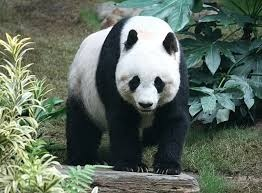

In [134]:
Image.open(results[0].save_dir+"/panda.jpg")

In [135]:
# plot on local machine
for i_r in results:
    im_array = i_r.cpu().numpy().plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image

### Train YOLOv8 on custom dataset

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
!cp "/content/drive/My Drive/Colab Notebooks/Labor 6/conf.yaml" "/content/datasets"

In [138]:
# The data directory is currently hard-coded, if you want to train in different location you need to change it:
#C:\Users\name\AppData\Roaming\Ultralytics\settings.yaml
# then you need to re-import it
#import ultralytics
#ultralytics.checks()

#from ultralytics import YOLO

# Train YOLOv8 on costume dataset for 3 epochs
#model = YOLO("yolov8n.yaml")  # build a new model from scratch
# train the model cfg="conf.yaml" data="test.yaml", epochs=10, imgsz=320, batch=16, project="Labor", name="Test"
model.train(cfg="conf.yaml",data="test.yaml")

WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.299999999999999' in the future. Please use 'show_boxes' instead.
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=None, data=test.yaml, epochs=10, time=None, patience=50, batch=32, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=Labor, name=Test, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False,

100%|██████████| 755k/755k [00:00<00:00, 51.4MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1859.89it/s]

train: New cache created: coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to Labor/Test/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to Labor/Test
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.879      4.649      2.374        178        320: 100%|██████████| 4/4 [00:34<00:00,  8.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.40s/it]

                   all        128        929      0.128    0.00116   0.000498   0.000278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.877        4.6      2.353        225        320: 100%|██████████| 4/4 [00:28<00:00,  7.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.73s/it]

                   all        128        929     0.0573   0.000802   0.000146   4.42e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.848      4.604      2.324        235        320: 100%|██████████| 4/4 [00:27<00:00,  6.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.14s/it]

                   all        128        929     0.0156   0.000776   0.000213   6.99e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      2.818      4.577      2.343        207        320: 100%|██████████| 4/4 [00:30<00:00,  7.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.33s/it]

                   all        128        929   5.98e-05    0.00482   0.000399   0.000116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      2.774      4.617      2.311        186        320: 100%|██████████| 4/4 [00:28<00:00,  7.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.39s/it]

                   all        128        929   0.000318    0.00646   0.000405   0.000138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      2.856      4.543      2.346        177        320: 100%|██████████| 4/4 [00:27<00:00,  7.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.52s/it]

                   all        128        929   0.000538    0.00738   0.000629   0.000291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      2.827      4.588      2.284        271        320: 100%|██████████| 4/4 [00:27<00:00,  6.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.55s/it]

                   all        128        929    0.00052    0.00732   0.000799   0.000359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      2.788      4.593      2.264        232        320: 100%|██████████| 4/4 [00:27<00:00,  6.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.27s/it]

                   all        128        929   0.000462    0.00743    0.00097     0.0005



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      2.822      4.529      2.305        245        320: 100%|██████████| 4/4 [00:27<00:00,  6.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.57s/it]

                   all        128        929   0.000614    0.00857    0.00205   0.000998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      2.773      4.556      2.289        237        320: 100%|██████████| 4/4 [00:27<00:00,  6.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.22s/it]

                   all        128        929   0.000495    0.00863    0.00204    0.00122



10 epochs completed in 0.118 hours.
Optimizer stripped from Labor/Test/weights/last.pt, 6.5MB
Optimizer stripped from Labor/Test/weights/best.pt, 6.5MB

Validating Labor/Test/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.38s/it]


                   all        128        929     0.0005    0.00863    0.00204    0.00122
                person        128        254    0.00254      0.382     0.0468     0.0186
               bicycle        128          6          0          0          0          0
                   car        128         46          0          0          0          0
            motorcycle        128          5          0          0          0          0
              airplane        128          6          0          0          0          0
                   bus        128          7          0          0          0          0
                 train        128          3          0          0          0          0
                 truck        128         12          0          0          0          0
                  boat        128          6          0          0          0          0
         traffic light        128         14          0          0          0          0
             stop sig

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78ea7d55a2f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

## 4. Visualize results

All results are logged by default to `runs/detect/train`, with a new experiment directory created for each new training as `runs/detect/train2`, `runs/detect/train3`, etc.

or

with the predefined project="Labor", name="Test"

In [139]:
 # train batch 0 mosaics and labels
Image.open(os.getcwd()+"/Labor/Test/train_batch0.jpg")

Output hidden; open in https://colab.research.google.com to view.

Training results are automatically logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and [txt] as `results.txt`, which is plotted as `results.png` (below) after training completes. You can also plot any `results.txt` file manually.Good summary about the metrics (https://en.wikipedia.org/wiki/Precision_and_recall)

Optimizer:
- ADAMW https://paperswithcode.com/method/adamw

Losses:
- box_loss
- cls_loss
- dfl_loss - helps with class inballance:
Hossain, Md Sazzad, et al. “Dual Focal Loss to Address Class Imbalance in Semantic Segmentation.” Neurocomputing, vol. 462, Elsevier BV, Oct. 2021, pp. 69–87, doi:10.1016/j.neucom.2021.07.055.

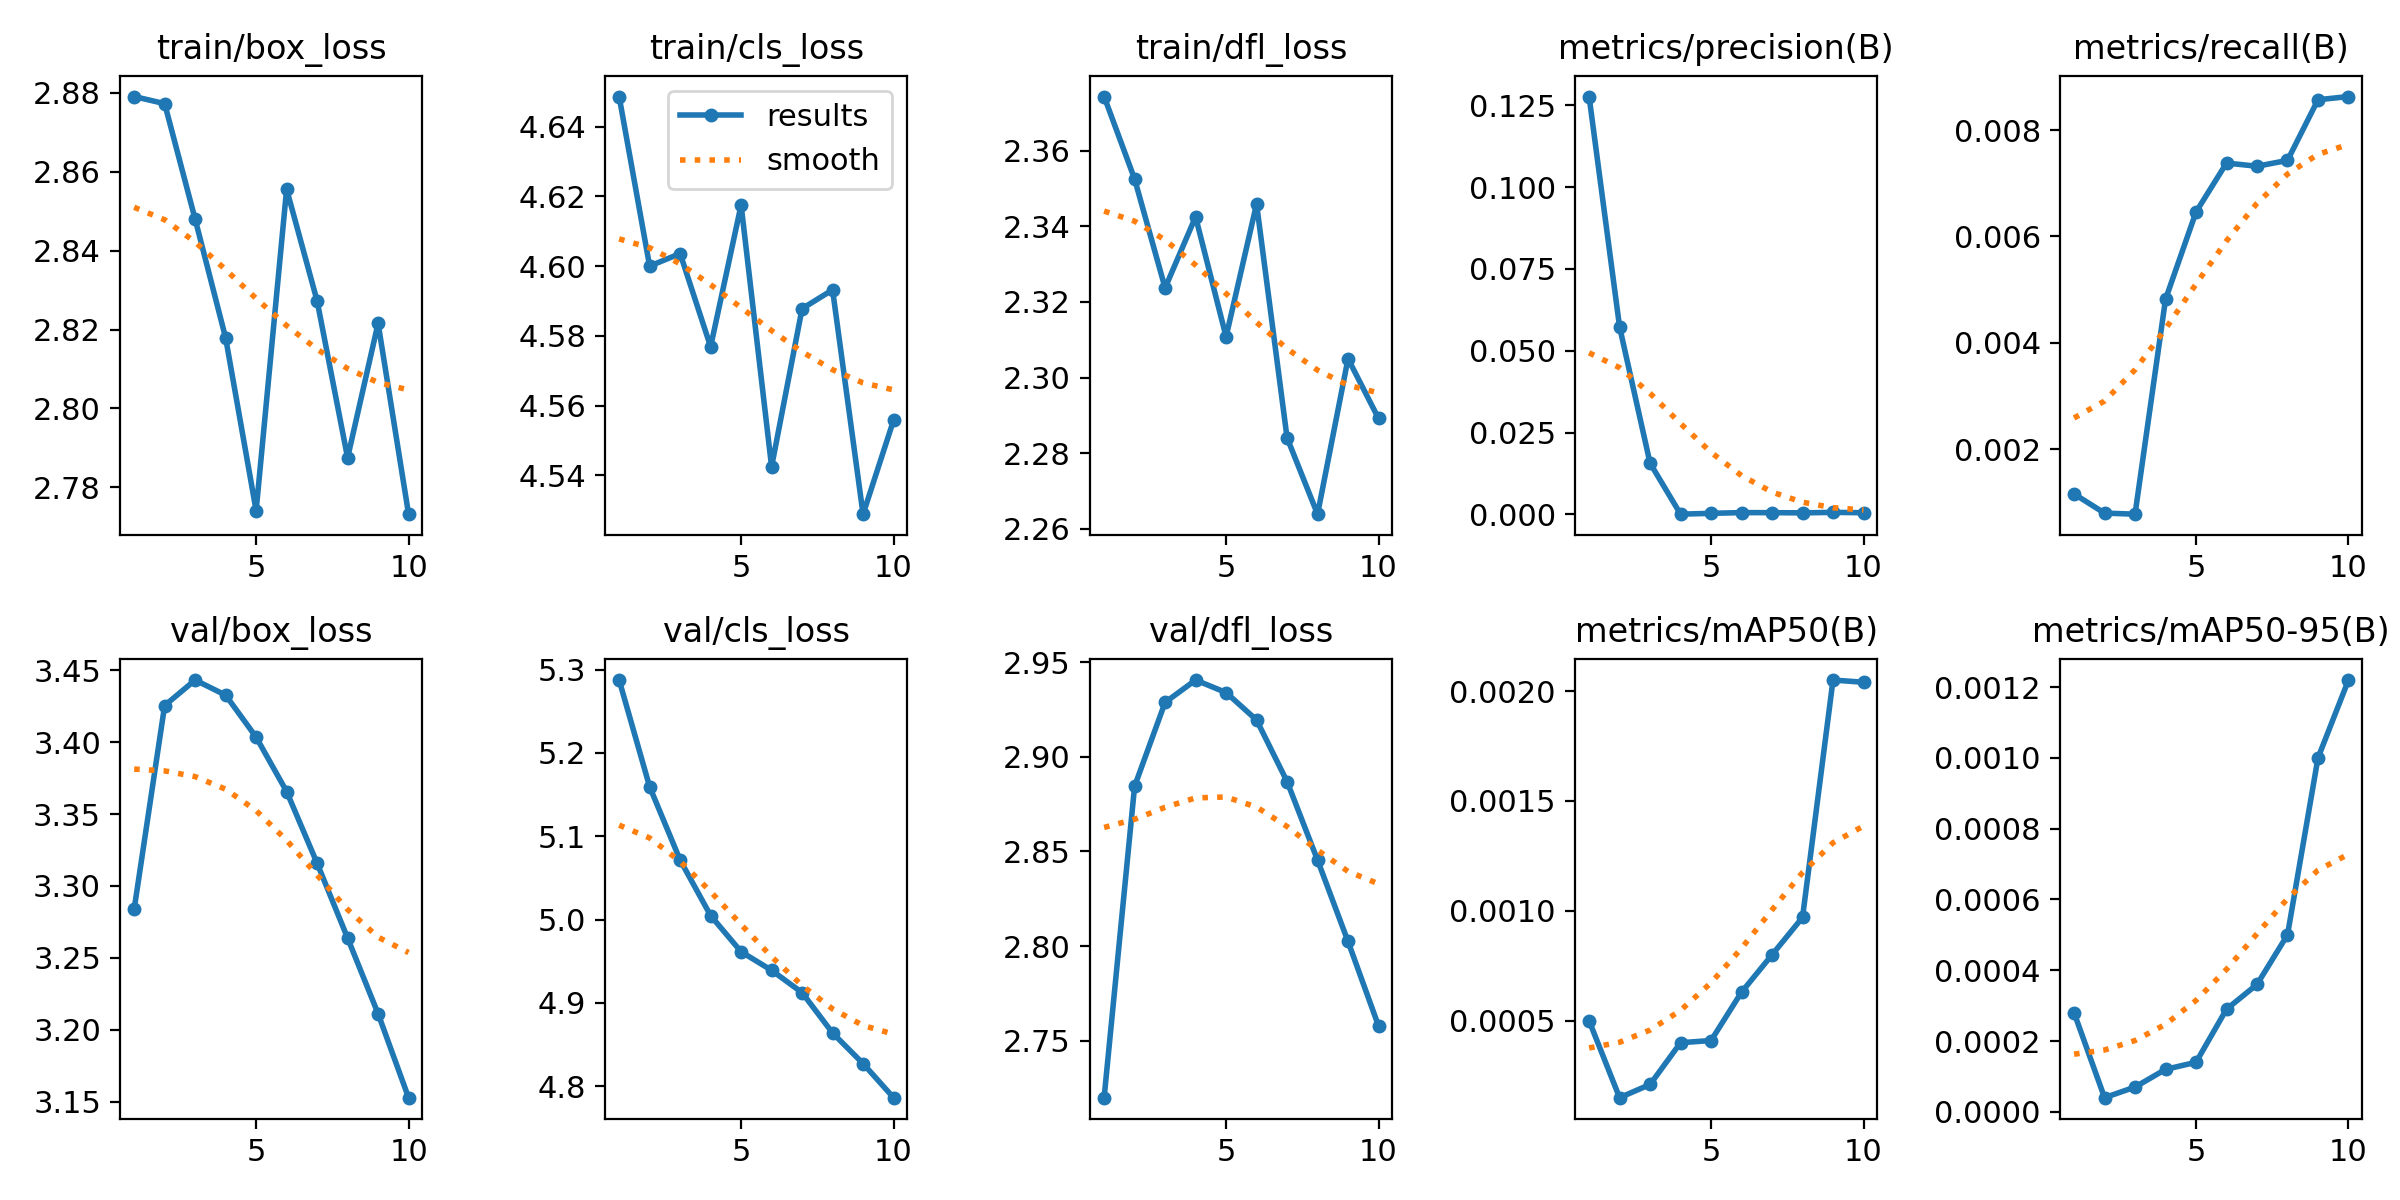

In [140]:
Image.open(os.getcwd()+'/Labor/Test/results.png')

## 5. Usage

detect.py can be run on images and videos. The three most important parameters of the detect function are:
- the image size (it can be different from the training size, as we discussed),
- confidence level (estimated probability),
- IoU threshold (merge nearby predictions)

The prediction saved in **runs\detect\predict**

In [141]:
results = model.predict(source=os.getcwd()+'/panda.jpg', imgsz= 1280, conf=0.01, iou=0.5, save = True)


image 1/1 /content/datasets/panda.jpg: 960x1280 6 persons, 2 cars, 1 train, 1 truck, 1 bench, 2 birds, 1 dog, 1 horse, 1 cow, 3 bears, 1 umbrella, 815.5ms
Speed: 22.7ms preprocess, 815.5ms inference, 7.1ms postprocess per image at shape (1, 3, 960, 1280)
Results saved to Labor/Test2


In [142]:
# plot on local machine
for r in results:
    im_array = r.cpu().numpy().plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image

<div style="text-align: right">Created by Szilárd Kovács</div>